In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys

# Gathering

In [2]:
#reading csv file and put it in df
df = pd.read_csv("twitter-archive-enhanced.csv")
#display first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#download tsv file from the link and using requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# reading the tsv file and put it in df_img
df_img = pd.read_csv('image-predictions.tsv', sep="\t")
#display first 5 rows
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#API consumer key, consumer secret, access secret and access token
consumer_key = "OfsDgbIIQxBCvycfMeWaPefxl"
consumer_secret = "xgvzl9Hr1Cp06fj4NRSc2nCP8Q1O4kj8EZ5sAUY1vm7RGpZJBU"
access_token = "515544267-zz0ngOXhjdW1He3mujYSQMif25AKuhWsSQ1qtccx"
access_secret = "5IboFCD0YZECJfwZf1cPhBZxoMFAkkeaj5tCjqJwAFVng"

In [6]:
#tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth)

In [7]:
tweetID = list(df.tweet_id)

tweets = {}
for tweet in tweetID:
    try:
        tweetStatus = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweets[str(tweet)] = tweetStatus._json
    except:
        continue

Rate limit reached. Sleeping for: 731
Rate limit reached. Sleeping for: 728


In [8]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweets, file)

In [9]:
with open('tweet_json.txt') as file:
    data = json.load(file)    
tweetList = []
for tweet_id in data.keys():
    retweet_count = data[tweet_id]['retweet_count']
    favorite_count = data[tweet_id]['favorite_count']
    tweetList.append({'id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [10]:
tweetData = pd.DataFrame(tweetList, columns = ['id', 'retweet_count', 'favorite_count'])

In [11]:
tweetData.head()

,id,retweet_count,favorite_count
0,892420643555336193,8323,38044
1,892177421306343426,6149,32667
2,891815181378084864,4069,24578
3,891689557279858688,8469,41402
4,891327558926688256,9164,39576


# Assessing Data

In [12]:
#display first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#describtion of the dataset
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#display first 5 rows
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
#info of the dataset
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#describtion of the dataset
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#display first 5 rows
tweetData.head()

,id,retweet_count,favorite_count
0,892420643555336193,8323,38044
1,892177421306343426,6149,32667
2,891815181378084864,4069,24578
3,891689557279858688,8469,41402
4,891327558926688256,9164,39576


In [19]:
#info of the dataset
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [20]:
#describtion of the dataset
tweetData.describe()

,retweet_count,favorite_count
count,2340.000000,2340.000000
mean,2931.239316,7966.072650
std,4937.968952,12337.345707
min,0.000000,0.000000
25%,588.750000,1376.250000
50%,1369.000000,3465.500000
75%,3415.250000,9749.000000
max,83712.000000,164363.000000


# Cleaning Data

In [21]:
# copy all of the three dataset
dfClean = df.copy()
df_imgClean = df_img.copy()
tweetDataClean = tweetData.copy()

In [22]:
#Remove retweets
dfClean = dfClean[dfClean['retweeted_status_id'].notnull()==False]

In [23]:
#Remove retweeted columns
DeleteColumns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
dfClean = dfClean.drop(DeleteColumns, axis=1)

In [24]:
#info of the dataset
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [25]:
#Remove rows with no images
dfClean.dropna(subset=['expanded_urls'], inplace=True)

In [26]:
# test Remove rows with no images
sum(dfClean['expanded_urls'].notnull()==False)

0

In [27]:
#convort timestamp column to datetime 
dfClean['timestamp'] = pd.to_datetime(dfClean['timestamp'])

In [28]:
#info of the dataset
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 248.1+ KB


In [29]:
#change id name to tweet_id
tweetDataClean=tweetDataClean.rename(columns={'id': 'tweet_id'})

In [30]:
tweetDataClean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8323,38044
1,892177421306343426,6149,32667
2,891815181378084864,4069,24578
3,891689557279858688,8469,41402
4,891327558926688256,9164,39576


In [31]:
#convert rating_numerator and rating_denominator columns to float 
dfClean['rating_numerator'] = dfClean['rating_numerator'].astype(float)
dfClean['rating_denominator'] = dfClean['rating_denominator'].astype(float)

In [32]:
#info of the dataset
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 248.1+ KB


In [33]:
#convert tweet_id column to string
dfClean.tweet_id = dfClean.tweet_id.astype(str)

In [34]:
#info of the dataset
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 248.1+ KB


In [35]:
# combine doggo,floofer,pupper and puppo to one column
dfClean['dogStage'] = dfClean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [36]:
# remove doggo,floofer,pupper and puppo
columns = ['doggo', 'floofer', 'pupper', 'puppo']
dfClean = dfClean.drop(columns, axis=1)

In [37]:
# remove unused columns 
dfClean=dfClean.drop(['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id','source'], axis=1)

In [38]:
#display first 5 rows
dfClean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN


In [39]:
#replace the none to nan in name 
dfClean['name'] = dfClean['name'].replace('None', np.NaN)

In [40]:
#display first 20 rows
dfClean.head(20)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


In [41]:
# remove unused columns 
df_imgClean=df_imgClean.drop(['img_num'], axis=1)

In [42]:
#display first 5 rows
df_imgClean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
#display first 5 rows
tweetDataClean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8323,38044
1,892177421306343426,6149,32667
2,891815181378084864,4069,24578
3,891689557279858688,8469,41402
4,891327558926688256,9164,39576


In [44]:
#remove the underscore
df_imgClean['p1'] = df_imgClean['p1'].str.replace('_', ' ')
df_imgClean['p2'] = df_imgClean['p2'].str.replace('_', ' ')
df_imgClean['p3'] = df_imgClean['p3'].str.replace('_', ' ')

In [45]:
#display first 5 rows
df_imgClean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
#convert tweet_id column to string
df_imgClean.tweet_id = df_imgClean.tweet_id.astype(str)

In [47]:
#merge the 3 datasets
dfMerge = pd.merge(dfClean, tweetDataClean,on='tweet_id', how='inner')

In [48]:
dfMerge = pd.merge(dfMerge, df_imgClean,on='tweet_id', how='inner')

In [49]:
dfMerge.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8323,38044,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6149,32667,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4069,24578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8469,41402,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9164,39576,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


# Storing Data

In [50]:
# store the dfMerge to twitter_archive_master.csv
dfMerge.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

In [51]:
# Read the csv file and put it in dfMergeFinal
dfMergeFinal= pd.read_csv("twitter_archive_master.csv")

In [52]:
#display first 5 rows
dfMergeFinal.head()

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8323,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6149,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4069,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8469,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9164,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


In [53]:
dfMergeFinal.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,995.500000,7.358697e+17,12.282129,10.532631,2653.011546,8732.776606,0.593736,1.344164e-01,6.028013e-02
std,575.185188,6.749923e+16,41.518523,7.324367,4729.700418,12807.350068,0.271942,1.006394e-01,5.089864e-02
min,0.000000,6.660209e+17,0.000000,2.000000,12.000000,78.000000,0.044333,1.011300e-08,1.740170e-10
25%,497.750000,6.758399e+17,10.000000,10.000000,592.000000,1874.000000,0.362775,5.401683e-02,1.619708e-02
50%,995.500000,7.084748e+17,11.000000,10.000000,1274.000000,3950.000000,0.587440,1.174550e-01,4.950530e-02
75%,1493.250000,7.878678e+17,12.000000,10.000000,3036.500000,10876.500000,0.845599,1.949773e-01,9.162278e-02
max,1991.000000,8.924206e+17,1776.000000,170.000000,83712.000000,164363.000000,1.000000,4.880140e-01,2.734190e-01


In [54]:
# remove unused columns 
dfMergeFinal=dfMergeFinal.drop(['Unnamed: 0'], axis=1)

In [55]:
#display first 5 rows
dfMergeFinal.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8323,38044,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6149,32667,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4069,24578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8469,41402,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9164,39576,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


In [56]:
# display rating_denominator with 10
dfMergeFinal[dfMergeFinal['rating_denominator']==10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8323,38044,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6149,32667,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4069,24578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8469,41402,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9164,39576,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3049,19873,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2020,11618,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,18465,64204,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4188,27311,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7219,31333,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [57]:
# display rating_denominator with 1
dfMergeFinal[dfMergeFinal['rating_denominator']==1]
# no data found here 

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [58]:
# display retweet_count greater than 100
dfMergeFinal[dfMergeFinal['retweet_count']>100]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8323,38044,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6149,32667,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4069,24578,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8469,41402,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9164,39576,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,3049,19873,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2020,11618,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,18465,64204,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,4188,27311,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7219,31333,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [59]:
# display retweet_count greater than 100
dfMergeFinal[dfMergeFinal['retweet_count']<100]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1544,674737130913071104,2015-12-09 23:47:22,Meet Rufio. He is unaware of the pink legless ...,https://twitter.com/dog_rates/status/674737130...,10.0,10.0,Rufio,pupper,96,664,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True
1705,671159727754231808,2015-11-30 02:52:03,This is Anthony. He just finished up his maste...,https://twitter.com/dog_rates/status/671159727...,5.0,10.0,Anthony,NaN,84,383,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
1723,670822709593571328,2015-11-29 04:32:51,Can't do better than this lol. 10/10 for the o...,https://twitter.com/dog_rates/status/670822709...,10.0,10.0,NaN,NaN,99,623,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,web site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
1728,670803562457407488,2015-11-29 03:16:46,I would do radical things in the name of Dog G...,https://twitter.com/dog_rates/status/670803562...,10.0,10.0,NaN,NaN,89,347,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,basenji,0.344101,True,Ibizan hound,0.210282,True,toy terrier,0.196279,True
1736,670778058496974848,2015-11-29 01:35:26,"""To bone or not to bone?""\n10/10 https://t.co/...",https://twitter.com/dog_rates/status/670778058...,10.0,10.0,NaN,NaN,74,332,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,pug,0.776612,True,Brabancon griffon,0.112032,True,boxer,0.039051,True
1745,670676092097810432,2015-11-28 18:50:15,This is Bloo. He's a Westminster Cîroc. Doesn'...,https://twitter.com/dog_rates/status/670676092...,8.0,10.0,Bloo,NaN,44,253,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg,Dandie Dinmont,0.676102,True,West Highland white terrier,0.040826,True,clumber,0.039533,True
1748,670468609693655041,2015-11-28 05:05:47,This is Edd. He's a Czechoslovakian Googolplex...,https://twitter.com/dog_rates/status/670468609...,10.0,10.0,Edd,NaN,87,356,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,minivan,0.730152,False,beach wagon,0.078661,False,car wheel,0.064346,False
1767,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9.0,10.0,a,NaN,69,333,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,platypus,0.974075,False,spotted salamander,0.011068,False,bison,0.003897,False
1782,670003130994700288,2015-11-26 22:16:09,This is Raphael. He is a Baskerville Conquista...,https://twitter.com/dog_rates/status/670003130...,10.0,10.0,Raphael,NaN,96,337,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,beagle,0.375313,True,Saint Bernard,0.174911,True,English foxhound,0.115888,True
1783,669993076832759809,2015-11-26 21:36:12,This is Zoey. Her dreams of becoming a hippo b...,https://twitter.com/dog_rates/status/669993076...,9.0,10.0,Zoey,pupper,87,329,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,piggy bank,0.176320,False,hair spray,0.097487,False,toy poodle,0.086502,True


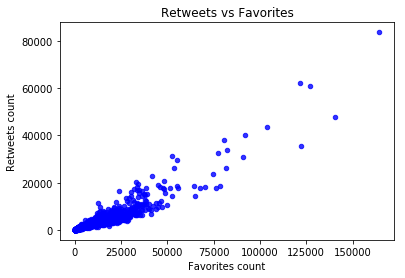

In [60]:
dfMergeFinal.plot(kind='scatter', x ='favorite_count',y = 'retweet_count', color='blue',alpha=0.8);
plt.xlabel('Favorites count')
plt.ylabel('Retweets count')
plt.title('Retweets vs Favorites');

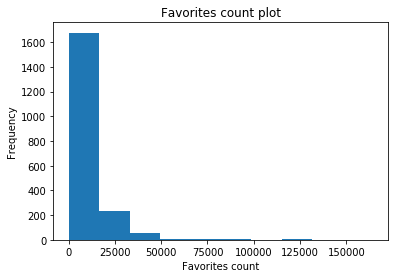

In [61]:
#plot the favorite count
plt.hist(dfMergeFinal.favorite_count)
plt.xlabel('Favorites count')
plt.ylabel('Frequency')
plt.title('Favorites count plot');

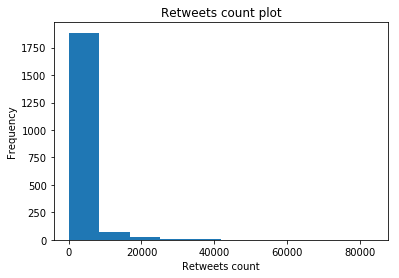

In [62]:
#plot the retweet count
plt.hist(dfMergeFinal.retweet_count)
plt.xlabel('Retweets count')
plt.ylabel('Frequency')
plt.title('Retweets count plot');